In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create model grid
x = np.linspace(0,50,51)

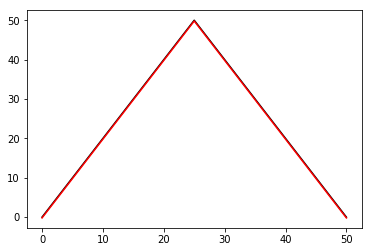

In [11]:
# Define initial elevation along hillslope
zi = np.zeros_like(x)
for i in np.arange(1,len(zi)):
    if i <= (len(zi)/2.):
        zi[i] = zi[i-1] + 2
    else:
        zi[i] = zi[i-1] - 2
        
#Define initial bedrock height along hillslope
# wi = np.zeros_like(x)
# for i in np.arange(1,len(wi)):
#     if i <= (len(wi)/2.):
#         wi[i] = wi[i-1] + 9.5
#     else:
#         wi[i] = wi[i-1] - 9.5
wi = zi - 0.2
        
# Plot initial elevation of model to make sure it looks good
plt.plot(x,zi,'k')
plt.plot(x,wi,'r')

In [23]:
def evolve(x,zi,wi,k,aw,bw,t,dt,u):
    # Calculate dx
    dx = x[1]-x[0]
    # Create array so store elevation at each timestep
    z_out = np.zeros(((t/dt)+1,len(x)))
    # Store initial Elevation as timestep 0 in array
    z_out[0] = zi
    # Create array of times at different timesteps
    t = np.linspace(dt,t,t/dt)
    t = np.concatenate(([0],t))
    # Set Elevation at boundaries
    z_out[:,0] = zi[0]
    z_out[:,-1] = zi[0]
    #Create loop to iterate through timesteps for diffusion
    for t in np.arange(1,len(t)):
        # Create loop to iterate through model grid
        for l in np.arange(1,len(x)-1):
            q_l = k*((z_out[t-1][l-1]-z_out[t-1][l])/dx)
            q_r = k*((z_out[t-1][l+1]-z_out[t-1][l])/dx)
            z_out[t][l] = z_out[t-1][l] + q_r*dt + q_l*dt + u*dt
    # Create array to store bedrockelevation at each timestep
    w_out = np.zeros(((t/dt)+1,len(x)))
    # Store initial bedrock Elevation as timestep 0 in array
    w_out[0] = wi
    # Create array of times at different timesteps
    t = np.linspace(dt,t,t/dt)
    t = np.concatenate(([0],t))
    # Set Bedrock Elevation at boundaries
    w_out[:,0] = wi[0]
    w_out[:,-1] = wi[0]
    # Create loop to iterate through timesteps for weathering
    for t in np.arange(1,len(t)):
        # Create loop to iterate through model grid
        for l in np.arange(1,len(x)-1):
            th = z_out[t-1][l] - w_out[t-1][l]
            w_r = aw*np.exp(-bw*th)
            w_out[t][l] = w_out[t-1][l] - w_r*dt + u*dt
    return z_out,w_out

In [ ]:
z_out,w_out = evolve(x,zi,wi,0.05,0.5,5,10000,1,0)

In [ ]:
plt.plot(z_out[5000])
plt.plot(w_out[5000])

In [21]:
dt = 0.5
t = 100
np.linspace(dt,t,t/dt)

/home/paul/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,
        18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,
        23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,
        27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,
        32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,  36. ,
        36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,  40.5,
        41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,  45. ,
        45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,  49.5,
        50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,  54. ,
        54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,  58.5,
        59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,  63. ,
        63.5,  64. ,